In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("data.csv")

In [3]:
df = data 
df.head()

,DEPT,TWT,amp,AI_Log,Int,D2,Quadr,TraceGrad,GradMag,Freq,Phase,CosPhase,AI_HRS_inv
0,1586.1,1158.5,2360.6,8896.0,2.58,-966.7,-121.8,-166.8,581.6,51.7,-2.9804,0.9551,NaN
1,1586.2,1158.6,2363.8,8589.0,2.57,-957.9,-45.4,-186.0,569.2,51.8,-1.2541,0.9609,NaN
2,1586.4,1158.7,2366.9,8321.0,2.55,-949.0,31.0,-205.3,556.7,51.9,0.4722,0.9667,NaN
3,1586.5,1158.7,2370.1,8081.0,2.54,-940.2,107.3,-224.6,544.3,51.9,2.1985,0.9724,NaN
4,1586.7,1158.8,2373.3,7828.0,2.52,-931.4,183.7,-243.9,531.9,52.0,3.9249,0.9782,NaN


([], [])

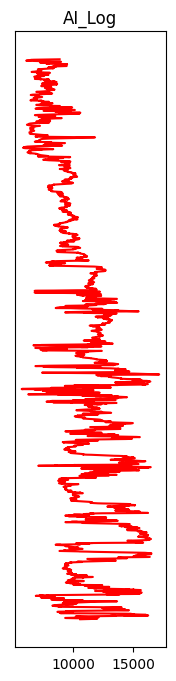

In [4]:
#Contoh Plot AI
y = -(data['TWT'] )

plt.figure(figsize=(16,8) )
plt.subplot(1,7,7)
plt.plot(data["AI_Log"], y, 'red')
plt.title("AI_Log")
plt.yticks([])

In [5]:
#Ini nanti dikasih dalem satu modul yang bisa dipanggil 
def Rc(df): #impedansi akustik
    Imp = df['AI_Log'].values
    Rc=[]
    for i in range(len(Imp)-1):
        Rc.append((Imp[i+1]-Imp[i])/(Imp[i]+Imp[i+1]))
    # to adjust vector size copy the last element to the tail
    Rc.append(Rc[-1])
    # Let's add Rc into dataframe as new column
    df['Rc'] = pd.Series(Rc, index=df.index)
    return df,Rc
def getRicker(f,length,t): #ricker wavelet
    t = np.arange(-length/2, (length-dt)/2,dt)
    pift = np.pi*f*t
    wav = (1 - 2*pift**2)*np.exp(-pift**2)
    return wav,t
def konvolusi(Rc,w): #Konvolusi 
    n_conv=len(Rc)-len(w)+1
    rev_w=w[::-1].copy()
    result=np.zeros(n_conv)
    for i_conv in range(n_conv):
      result[i_conv]=np.dot(Rc[i_conv:i_conv+len(w)],rev_w)
    return result

In [6]:
Rc(df)

(         DEPT     TWT     amp  AI_Log   Int     D2  Quadr  TraceGrad  GradMag  \
 0      1586.1  1158.5  2360.6  8896.0  2.58 -966.7 -121.8     -166.8    581.6   
 1      1586.2  1158.6  2363.8  8589.0  2.57 -957.9  -45.4     -186.0    569.2   
 2      1586.4  1158.7  2366.9  8321.0  2.55 -949.0   31.0     -205.3    556.7   
 3      1586.5  1158.7  2370.1  8081.0  2.54 -940.2  107.3     -224.6    544.3   
 4      1586.7  1158.8  2373.3  7828.0  2.52 -931.4  183.7     -243.9    531.9   
 ...       ...     ...     ...     ...   ...    ...    ...        ...      ...   
 29993     NaN     NaN     NaN     NaN   NaN    NaN    NaN        NaN      NaN   
 29994     NaN     NaN     NaN     NaN   NaN    NaN    NaN        NaN      NaN   
 29995     NaN     NaN     NaN     NaN   NaN    NaN    NaN        NaN      NaN   
 29996     NaN     NaN     NaN     NaN   NaN    NaN    NaN        NaN      NaN   
 29997     NaN     NaN     NaN     NaN   NaN    NaN    NaN        NaN      NaN   
 
        Freq  

In [7]:
f=20            #wavelet frequency
length=0.512    #Wavelet vector length
dt=0.001         # Sampling prefer to use smiliar to resampled AI
t, w = getRicker(f,length, dt)

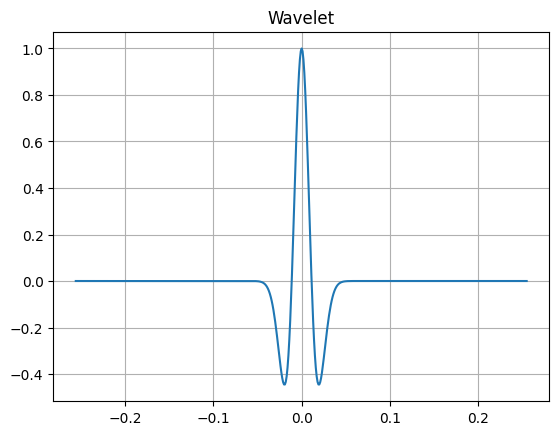

In [12]:
t, w = getRicker(20,0.512, 0.001)
plt.plot(w,t)
plt.title('Wavelet')
plt.grid()

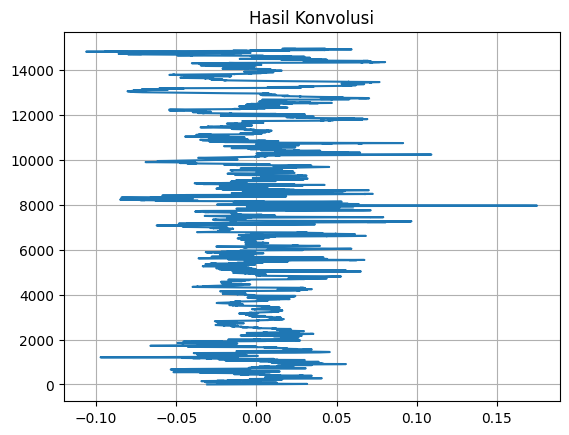

In [8]:
#Plot sinyal konvolusi, yang lain juga disusulin ya plotnya kayak rickernya, terus impedansi akustiknya, dll
sinyalsintetik=konvolusi(df['Rc'],w)
t = np.arange(0,len(sinyalsintetik),1)
plt.plot(sinyalsintetik,t)
plt.title('Hasil Konvolusi')
plt.grid()